# NLO: Non-Linear Oscillator

http://web.physics.ucsb.edu/~fratus/phys103/LN/NLO.pdf

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import torch.nn as nn
from denn.nlo.nlo_utils import NLO_PARAMS, nlo_eqn, numerical_solution
from denn.utils import Generator, Discriminator
from denn.nlo.mse_nlo import train_MSE
from denn.nlo.gan_nlo import train_GAN_NLO

General NLO:
$$ \ddot{x}+2 \beta \dot{x}+\omega^{2} x+\phi x^{2}+\epsilon x^{3}=f(t) $$

Duffing equation: $$ \ddot{x} + \omega^2 x + \epsilon x^3 = 0$$ where $\omega = \sqrt{\frac{k}{m}}$ where $k$ is a constant and $m$ is a mass, and $\epsilon = \frac{\lambda}{6m}, \lambda > 0$

In [2]:
NLO_PARAMS

{'omega': 1,
 'epsilon': 0.1,
 'beta': 0.1,
 'phi': 1,
 'F': 0.1,
 'forcing': <function denn.nlo.nlo_utils.<lambda>(t)>,
 'x0': 0,
 'dx0': 0.5}

In [3]:
n = 100
periods = 4
t = np.linspace(0, periods * np.pi, n)

In [4]:
x = numerical_solution(t)

Numerical solution succes: True


In [5]:
x.shape

(100,)

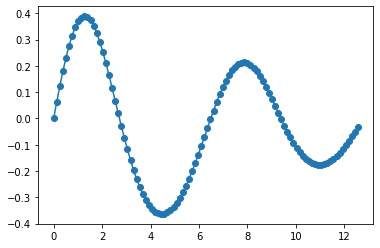

In [6]:
plt.plot(t, x, '-o');

In [7]:
from denn.utils import Generator
from denn.nlo.mse_nlo import train_MSE

N_ITERS = 10000
N_HIDDEN = 64
N_LAYERS = 8
N_PERIODS = 4

### Supervised

Numerical solution success: True


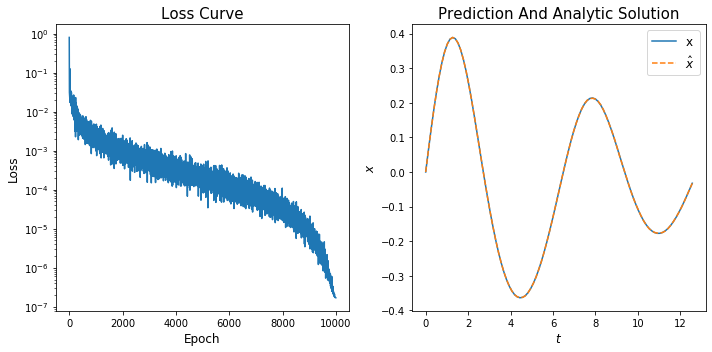

Final MSE: 1.7003135610593745e-07


In [8]:
resgnet = Generator(n_hidden_units=N_HIDDEN, n_hidden_layers=N_LAYERS, residual=True, output_tan=True)
sup_res = train_MSE(resgnet, method='supervised', niters=N_ITERS, nperiods=N_PERIODS, make_plot=True)

## Semi-Supervised

Numerical solution success: True


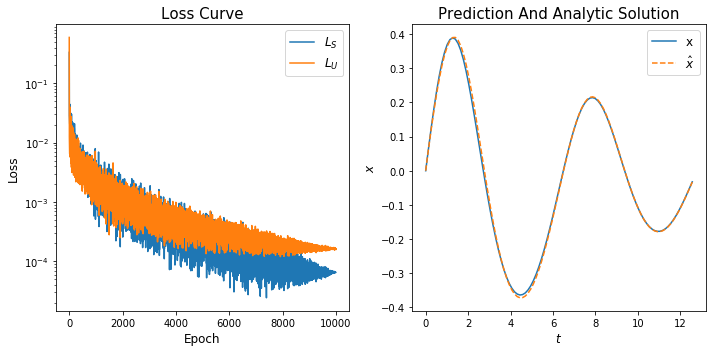

Final MSE: 6.526934885187075e-05


In [9]:
resgnet = Generator(n_hidden_units=N_HIDDEN, n_hidden_layers=N_LAYERS, residual=True, output_tan=True)
semisup_res = train_MSE(resgnet, method='semisupervised', niters=N_ITERS, nperiods=N_PERIODS, make_plot=True)

#### Observe every = 4

Numerical solution succes: True


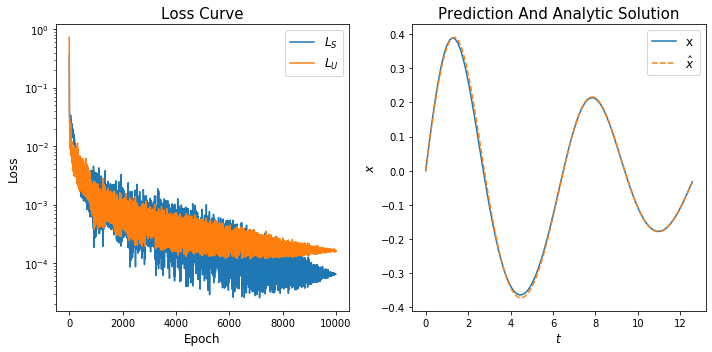

Final MSE: 6.494608533103019e-05


In [4]:
resgnet = Generator(n_hidden_units=N_HIDDEN, n_hidden_layers=N_LAYERS, residual=True)
semisup_res = train_MSE(resgnet, method='semisupervised', niters=N_ITERS, nperiods=N_PERIODS, make_plot=True, observe_every=4)

## Unsupervised

Numerical solution success: True


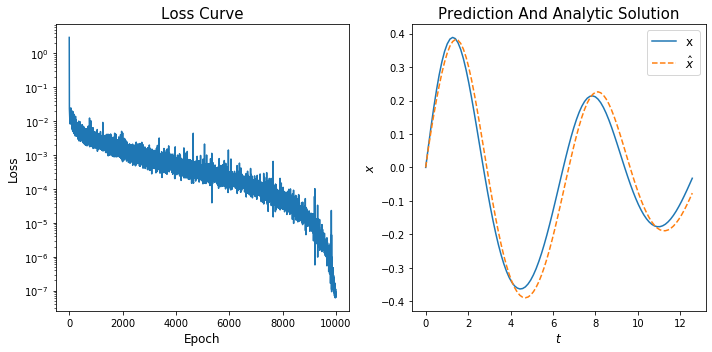

Final MSE: 0.0018424170557409525


In [10]:
resgnet = Generator(n_hidden_units=N_HIDDEN, n_hidden_layers=N_LAYERS, residual=True, output_tan=True)
unsup_res = train_MSE(resgnet, method='unsupervised', niters=N_ITERS, nperiods=N_PERIODS, make_plot=True)

## GAN

Numerical solution success: True


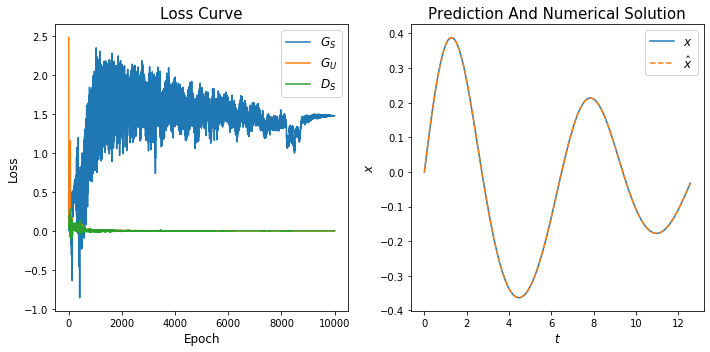

Final MSE: 1.5596130253925367e-07


In [5]:
D = Discriminator(in_dim=2, out_dim=1,
                      n_hidden_units=32,
                      n_hidden_layers=8,
                      activation=nn.Tanh(),
                      unbounded=True,   # true for WGAN
                      residual=True)

G = Generator(in_dim=1, out_dim=1,
              n_hidden_units=64,
              n_hidden_layers=8,
              activation=nn.Tanh(), # twice diff'able activation
              output_tan=True,      # true output range should be (-1,1) if True
              residual=True)

res = train_GAN_NLO(G, D, num_epochs=10000, final_plot=True)